In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Introduction

## What are Moments 

Moments are statistical descriptors that capture various properties of a shape. They can be used to calculate the centroid, area, orientation, and other characteristics of an object, and they are commonly used in image processing and computer vision applications.


## Types of Moments
### 1. Spatial Moments (mij):
•	m00: The zeroth spatial moment, representing the area of the object or the sum of pixel values. It’s analogous to the total “mass” if the image intensity is thought of as a mass distribution.
•	m10, m01: The first-order spatial moments, representing the sum of the pixel values weighted by their x and y coordinates, respectively. These moments are used to calculate the centroid (center of mass) of the object.
### 2. Central Moments (μij):
•	These moments are calculated with respect to the centroid of the object. They are translation invariant, meaning they do not change if the object is shifted in the image.
•	The central moments are used to describe the shape of the object and to derive other properties like orientation.
### 3. Normalized Central Moments (ηij):
•	These moments are scale-invariant, meaning they do not change if the object is resized. They are often used for object recognition and classification.
### 4. Hu Moments:
•	Derived from the central moments, Hu moments are seven invariant moments that are invariant to image scaling, rotation, and reflection. They are commonly used for shape recognition.


In this notebook, we will focus on spatial moments, central moments, normalized central moments, and Hu moments. These moments 

## Spatial Moments

### Create simple 10x10 numpy "image"

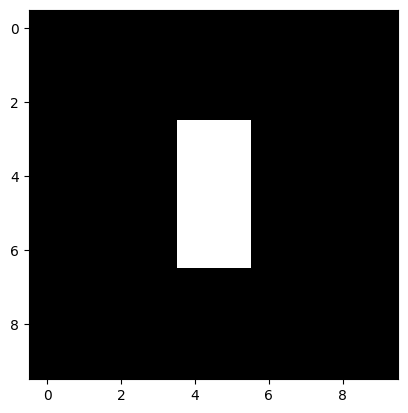

In [5]:
grid = np.zeros((10, 10), dtype=int)
grid[3:7, 4:6] = 1
plt.imshow(grid, cmap='gray', interpolation='none')


### Calculate centroid of the image

In order to calculate the centroid of the shape, we need to calculate the zeroth and first order moments

Let's show the full centroid calculation, then we'll unpack

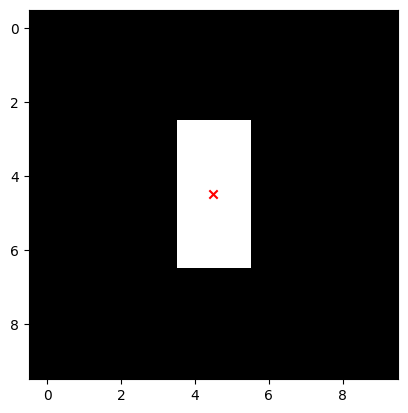

In [43]:
# zeroth moment is the total number of ones in the grid
m00 = np.sum(grid)

m10 = np.sum(grid * np.arange(grid.shape[1]))  # Moment with respect to x-coordinates
m01 = np.sum(grid * np.arange(grid.shape[0])[:, np.newaxis])  # Moment with respect to y-coordinates

# calculate centroid
cx = m10 / m00
cy = m01 / m00

# display the image and the centroid
plt.imshow(grid, cmap='gray', interpolation='none')
plt.scatter(cx, cy, color='red', marker='x')
plt.show()


### Unpacking m10 
The formula for m10 (first order moment with respect to x) is

In [26]:
m10 = np.sum(grid * np.arange(grid.shape[1]))

np.int64(36)

`np.arange` gives me a an array of number from 0 up to a given number.

In our case we go from 0 to the the number of rows (`grid.shape[1]`)

In [ ]:
np.arange(grid.shape[1])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

By multiplying that by the full grid, we are weighting each column by its x-coordinate

The parts of the image that are 0 will remain 0, and the ones with 1 will get substituted by it's position along x

In [41]:
grid * np.arange(grid.shape[1])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

By summing the values of the above calculation, we get the mass with respect to the x-coordinates. 

This number will be bigger if the mass is more to the right (x is bigger) and smaller if the mass is more to the left (x is smaller).


In [47]:
np.sum(grid * np.arange(grid.shape[1]))

np.int64(36)

### Same shape, rotated by 45 degrees

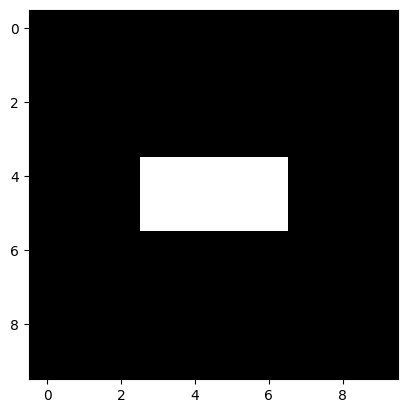

In [48]:
rotated_grid = np.zeros((10, 10), dtype=int)
rotated_grid[4:6, 3:7] = 1
plt.imshow(rotated_grid, cmap='gray', interpolation='none')

In [58]:
m00 = np.sum(rotated_grid)
m10 = np.sum(rotated_grid * np.arange(rotated_grid.shape[1]))
m01 = np.sum(rotated_grid * np.arange(rotated_grid.shape[0])[:, np.newaxis])
rotated_cx = m10 / m00
rotated_cy = m01 / m00
rotated_cx, rotated_cy
# Centroid is the same


(np.float64(4.5), np.float64(4.5))

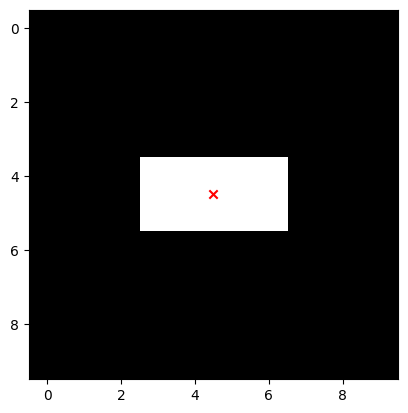

In [54]:
plt.imshow(rotated_grid, cmap='gray', interpolation='none')
plt.scatter(x=[cx], y=[cy], color='red', marker='x')
plt.show()

## TODO 
- add more examples
- A note on [newaxis]

## Central Moments

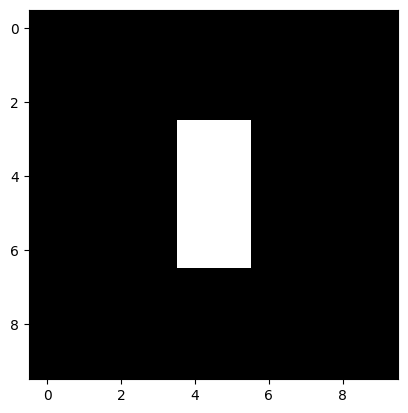

In [55]:
# We're back to the original image
grid = np.zeros((10, 10), dtype=int)
grid[3:7, 4:6] = 1

plt.imshow(grid, cmap='gray', interpolation='none')


In [72]:
# Calculate central moments (with respect to the centroid)
x_indices = np.arange(grid.shape[1]) - cx
y_indices = np.arange(grid.shape[0]) - cy
X, Y = np.meshgrid(x_indices, y_indices)
mu20 = np.sum(grid * X**2)
mu02 = np.sum(grid * Y**2)
mu11 = np.sum(grid * X * Y)
mu20, mu02, mu11


(np.float64(2.0),
 np.float64(10.0),
 np.float64(0.0),
 array([[-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5],
        [-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5],
        [-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5],
        [-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5],
        [-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5],
        [-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5],
        [-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5],
        [-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5],
        [-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5],
        [-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5]]),
 array([[-4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5],
        [-3.5, -3.5, -3.5, -3.5, -3.5, -3.5, -3.5, -3.5, -3.5, -3.5],
        [-2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5],
        [-1.5, -1.5, -1.5, -1.5, 

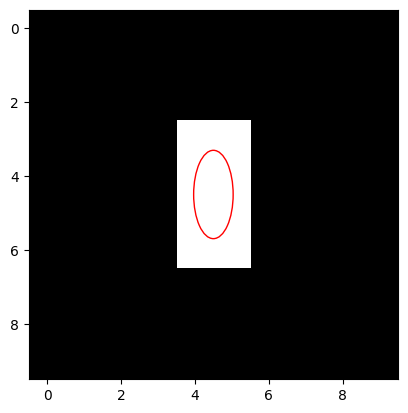

In [93]:
### How to visualize central moments
from matplotlib.patches import Ellipse

# ChatGPT suggests fitting an ellipse around the shape using the central moments, so i can illustrate orientation, aspect ratio and size of the shape

# Calculate the central moments

y,x = np.nonzero(grid)
# Calculate the covariance matrix
cov = np.cov(x, y)
# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov)
# Sort the eigenvectors by decreasing eigenvalues. I still don't understand slicing
order = eigenvalues.argsort()[::-1]

eigenvalues = eigenvalues[order]
eigenvectors = eigenvectors[:, order]

# Calculate the angle of the eigenvector with the largest eigenvalue


angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
width, height = 2 * np.sqrt(eigenvalues)

plt.imshow(grid, cmap='gray', interpolation='none')
ellipse = Ellipse(xy = (cx, cy), width = width, height = height, angle = angle, edgecolor = 'red', fc = 'None')
plt.gca().add_patch(ellipse)